In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 

In [2]:
df = pd.read_csv('muse_v3.csv',engine='python')
df.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal


In [3]:
# number of columns
number_col = len(df.columns)
number_col

11

In [4]:
number_row = df.shape[0]
number_row

90001

In [5]:
df['seeds'].describe()

count          90001
unique          9031
top       ['sleazy']
freq             938
Name: seeds, dtype: object

In [6]:
def valence_levels(row): 
    if row['valence_tags'] <= df['valence_tags'].mean(): 
        return "low"
    else:
        return "high"

In [8]:
df['Valence_levels'] = df.apply(valence_levels,axis=1)

In [9]:
def arousal_levels(row): 
    if row['arousal_tags'] <= df['arousal_tags'].mean(): 
        return "low"
    else:
        return "high"

In [10]:
df['Arousal_levels'] = df.apply(arousal_levels,axis=1)

In [11]:
def dominance_levels(row): 
    if row['dominance_tags'] <= df['dominance_tags'].mean(): 
        return "low"
    else:
        return "high"

In [12]:
df['Dominance_levels'] = df.apply(dominance_levels,axis=1)

In [13]:
df.groupby(['Valence_levels','genre'])['spotify_id'].count()

Valence_levels  genre     
high            8-bit          7
                a cappella    20
                abstract       1
                accordeon      0
                accordion      5
                              ..
low             worship       24
                wu fam         0
                yoga          15
                yoik           1
                zeuhl          8
Name: spotify_id, Length: 1291, dtype: int64

(array([   59.,   314.,   887.,  1087.,  4038.,  6336.,  7074.,  7006.,
         8665., 11235., 10668., 12703., 10991.,  7155.,  1783.]),
 array([0.235     , 0.78433333, 1.33366667, 1.883     , 2.43233333,
        2.98166667, 3.531     , 4.08033333, 4.62966667, 5.179     ,
        5.72833333, 6.27766667, 6.827     , 7.37633333, 7.92566667,
        8.475     ]),
 <BarContainer object of 15 artists>)

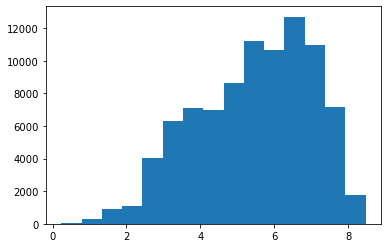

In [14]:
plt.hist(df.valence_tags,bins=15)

(array([   36.,   118.,   306.,   844.,  1276.,  2159.,  4104.,  5682.,
         8030., 11363., 12831., 16703., 14716.,  8840.,  2993.]),
 array([0.22923077, 0.70994872, 1.19066667, 1.67138462, 2.15210256,
        2.63282051, 3.11353846, 3.59425641, 4.07497436, 4.55569231,
        5.03641026, 5.51712821, 5.99784615, 6.4785641 , 6.95928205,
        7.44      ]),
 <BarContainer object of 15 artists>)

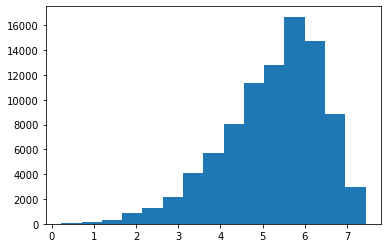

In [15]:
plt.hist(df.dominance_tags,bins=15)

(array([   47.,   272.,   642.,  1784.,  3081.,  4568., 10137., 11532.,
        15838., 12912., 12051.,  9314.,  4823.,  1629.,  1371.]),
 array([0.10811321, 0.58557233, 1.06303145, 1.54049057, 2.01794969,
        2.49540881, 2.97286792, 3.45032704, 3.92778616, 4.40524528,
        4.8827044 , 5.36016352, 5.83762264, 6.31508176, 6.79254088,
        7.27      ]),
 <BarContainer object of 15 artists>)

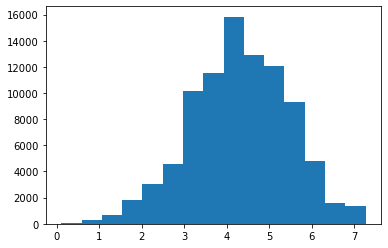

In [16]:
plt.hist(df.arousal_tags,bins=15)

In [17]:
df.dtypes

lastfm_url                 object
track                      object
artist                     object
seeds                      object
number_of_emotion_tags      int64
valence_tags              float64
arousal_tags              float64
dominance_tags            float64
mbid                       object
spotify_id                 object
genre                      object
Valence_levels             object
Arousal_levels             object
Dominance_levels           object
dtype: object

This is a dataset that describes different sentiment qualities of songs, categorized by groups like genres and "seeds", which are essentially mood tags. There are 90000 rows in total, so we have information about 90000 songs. There are also 11 columns that give data about each song. Some interesting columns are:

1. valence: "the pleasantness of a stimulus"
2. arousal: "the intensity of emotion provoked by a stimulus"
3. dominance: "the degree of control exerted by a stimulus"

All three of these columns are stored using the data type "float64". The column "number_of_emotion_tags" uses int64, and all other columns use the "object" type.

We would like to predict the valence, arousal, and dominance levels according to seed. We can also determine these levels by genre.

Looking our histogram visualizations, the graphs seem to skewed to the left for valence and dominance, which means that most songs have relatively high valence and dominance levels. Whereas, the arousal histogram is more equally distributed, so more songs fall around the median arousal level of the dataset.

Some of the elements in the dataset do not have values (NaN). Also, there seems to be a bias in the data towards certain kinds of music. Additional information/columns that could be helpful to the data are tempo, playlists the songs have been added to, instrumentality-to-voice percentages, and the release year of songs.
